In [1]:
%matplotlib inline

In [2]:
import data
from evaluate_model import evaluate_model, train_model
x, xtrain, xcross, xtest = data.load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

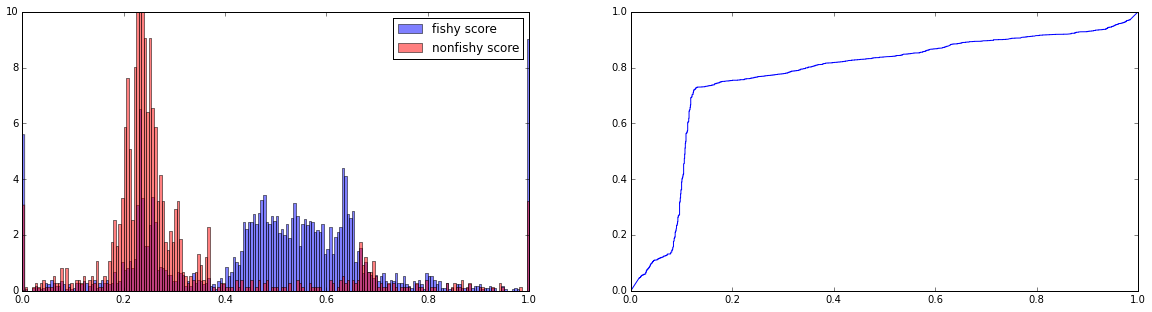

Error for <legacy_heuristic_model.LegacyHeuristicModel instance at 0x106402488>: 36.381651835%
False positives for <legacy_heuristic_model.LegacyHeuristicModel instance at 0x106402488>: 30.3166732168%


In [3]:
from legacy_heuristic_model import LegacyHeuristicModel

lhm1_args = dict(window=3600)
lhm1 = train_model(LegacyHeuristicModel(), xtest, **lhm1_args)
evaluate_model(lhm1, xtest, **lhm1_args)

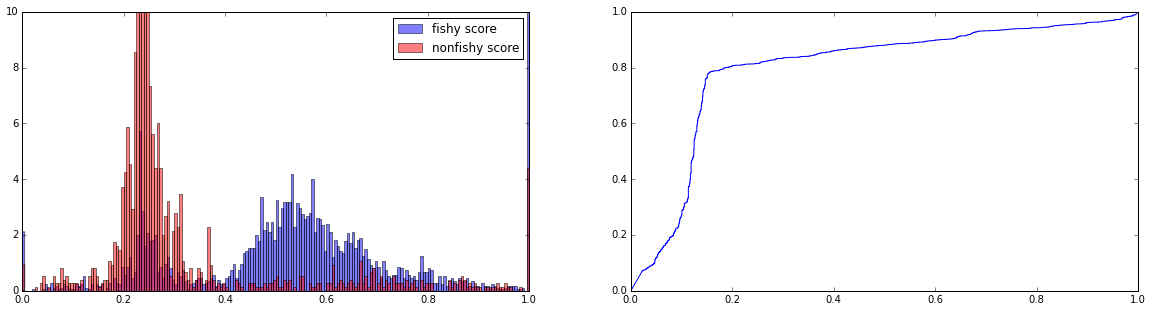

Error for <legacy_heuristic_model.LegacyHeuristicModel instance at 0x108072320>: 35.0549256995%
False positives for <legacy_heuristic_model.LegacyHeuristicModel instance at 0x108072320>: 33.6919060682%


In [4]:
lhm2_args = dict(window=10800)
lhm2 = train_model(LegacyHeuristicModel(), xtrain, **lhm2_args)
evaluate_model(lhm2, xtest, **lhm2_args)

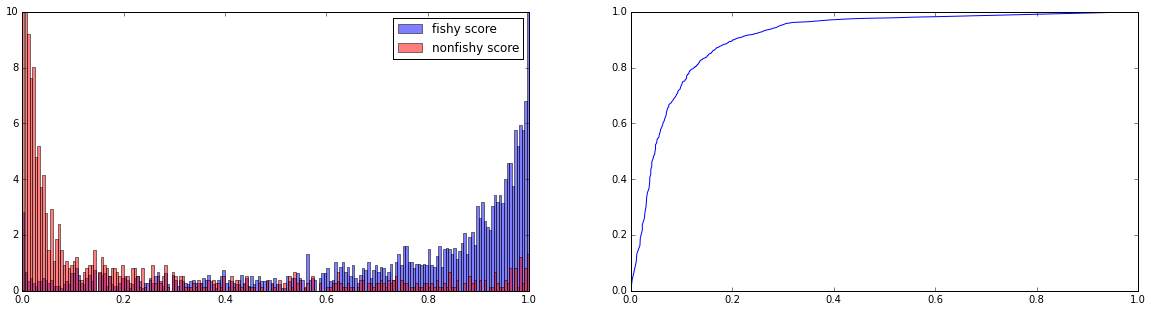

RandomForestModel(n_estimators=200, random_state=0)

AUC: 0.909921967154
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.66      0.87      0.75      1498
    fishing       0.94      0.81      0.87      3502

avg / total       0.85      0.82      0.83      5000

False positive rate: 0.0388


In [33]:
from random_forest_model import RandomForestModel

rfm1_args = dict(windows=[43200])
rfm1 = train_model(RandomForestModel(), xtrain, **rfm1_args)
evaluate_model(rfm1, xtest, **rfm1_args)

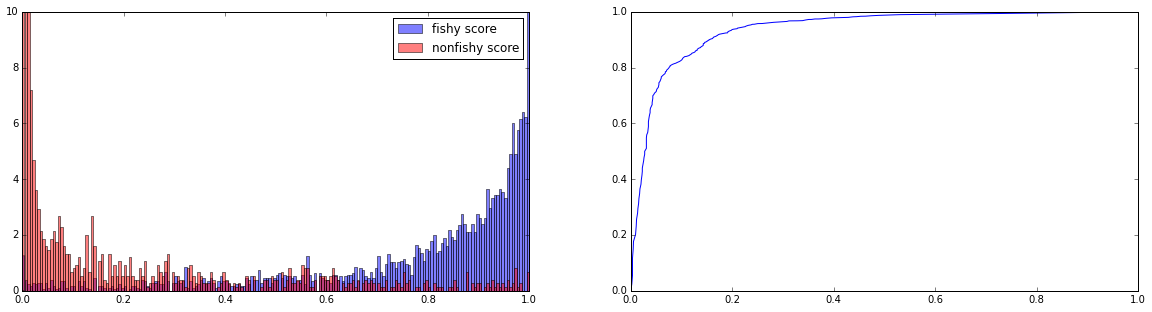

RandomForestModel(n_estimators=200, random_state=0)

AUC: 0.938229079854
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.73      0.87      0.80      1498
    fishing       0.94      0.87      0.90      3502

avg / total       0.88      0.87      0.87      5000

False positive rate: 0.0392


In [32]:
rfm2_args = dict(windows=[1800, 3600, 10800, 21600, 43200, 86400])
rfm2 = train_model(RandomForestModel(), xtrain, **rfm2_args)
evaluate_model(rfm2, xtest, **rfm2_args)

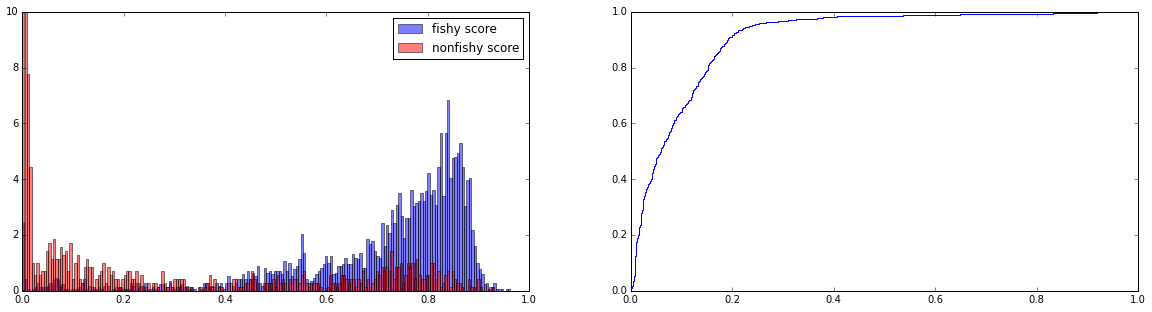

LogisticModel(C=1.0, class_weight=None, dual=False, fit_intercept=True,
       intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
       penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
       verbose=0, warm_start=False)

AUC: 0.908456849757
For cutoff of 0.5:
             precision    recall  f1-score   support

non-fishing       0.75      0.82      0.78      1498
    fishing       0.92      0.88      0.90      3502

avg / total       0.87      0.86      0.86      5000

False positive rate: 0.0548


In [31]:
from logistic_model import LogisticModel

lm1_args = dict(windows=[43200], order=6)
lm1 = train_model(LogisticModel(), xtrain, **lm1_args)
evaluate_model(lm1, xtest, **lm1_args)

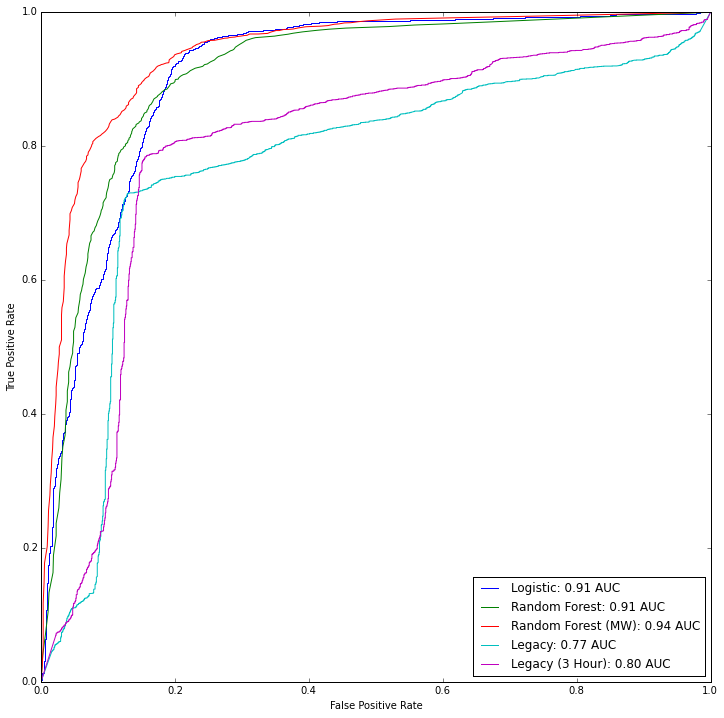

In [30]:
del evaluate_model
import evaluate_model, imp
imp.reload(evaluate_model)
from evaluate_model import evaluate_model, train_model, compare_auc

compare_auc([('Logistic', lm1, lm1_args),
             ('Random Forest', rfm1, rfm1_args),
             ('Random Forest (MW)', rfm2, rfm2_args),
             ('Legacy', lhm1, lhm1_args),
             ("Legacy (3 Hour)", lhm2, lhm2_args)], xtest)